In [414]:
import importlib
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pipeline as pp
import stats_hc as hc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [415]:
importlib.reload(pp)

pp.apply_pipeline(
    "../datasets/sample/raw_copy.csv", 
    [(pp.Valid_row(), None)],
    new_file="../datasets/sample/statistics/raw_copy_empty_cleaned.csv",
    progress_bar=True
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 250/250 [00:00<00:00, 8621.53it/s]

finish time: 0.1055295467376709


In [416]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/sample/statistics/raw_copy_empty_cleaned.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(sentences=False), 'content'),
        (pp.Remove_stopwords(stopwords_lst), 'content'),
        (pp.Stem(), 'content'),
    ],
    new_file="../datasets/sample/statistics/data.csv",
    progress_bar=True
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 230/230 [00:02<00:00, 79.25it/s] 

finish time: 4.4253644943237305


In [417]:
importlib.reload(hc)
Stat = hc.Statistics("../datasets/sample/statistics/data.csv")

In [418]:
importlib.reload(pp)
stopwords_lst = stopwords.words('english')

pp.apply_pipeline(
    "../datasets/sample/statistics/raw_copy_empty_cleaned.csv", 
    [   (pp.Binary_labels(), 'type', 'binary_label'),
        (pp.Clean_data(), 'content'),
        (pp.Clean_author(), 'authors'),
        (pp.Clean_domain(), 'domain'),
        (pp.Tokenizer(sentences=True), 'content')
        #(pp.Remove_stopwords(stopwords_lst), 'content'),
       # (pp.Stem(), 'content'),
        #(pp.Untokenizer(sentences=True), 'content'),
        #(pp.Tokenizer(sentences=True), 'content'),
    ],
    new_file="../datasets/sample/statistics/data_sentences.csv",
    progress_bar=True
)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 230/230 [00:00<00:00, 5948.67it/s]

finish time: 1.1399848461151123


In [419]:
importlib.reload(hc)
Stat_sentences = hc.Statistics("../datasets/sample/statistics/data_sentences.csv")

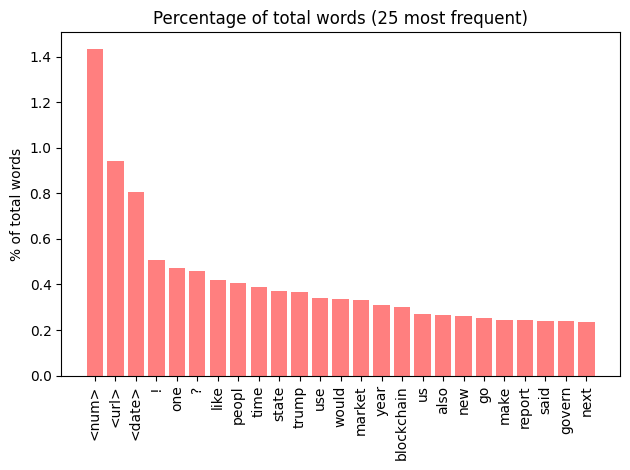

In [420]:
Stat.barplot_word_frequency(nwords=25, percentage=True)

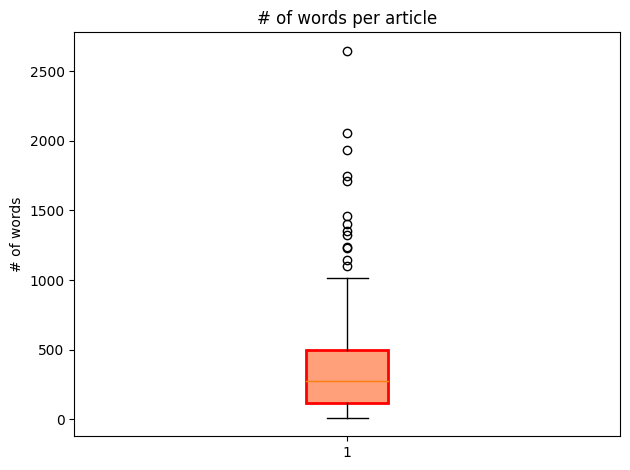

In [421]:
Stat.boxplot_word_frequency()

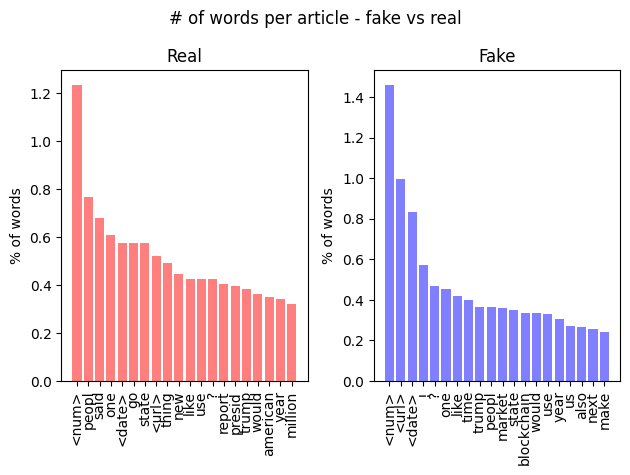

In [422]:
Stat.barplot_word_frequency_fake_vs_real(nwords=20, binary_label="binary_label", percentage=True)

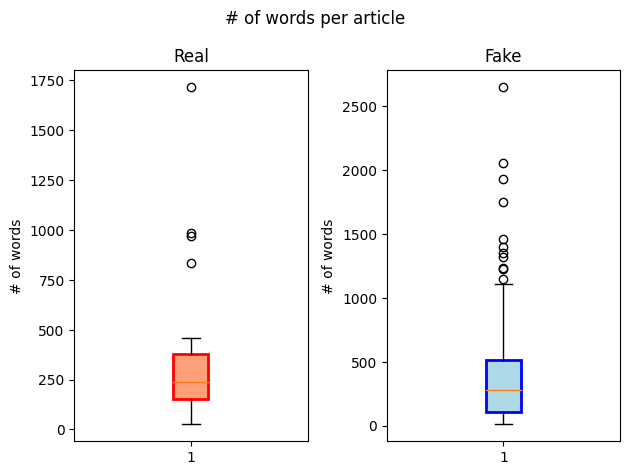

In [423]:
Stat.boxplot_word_frequency_fake_vs_real(binary_label="binary_label")

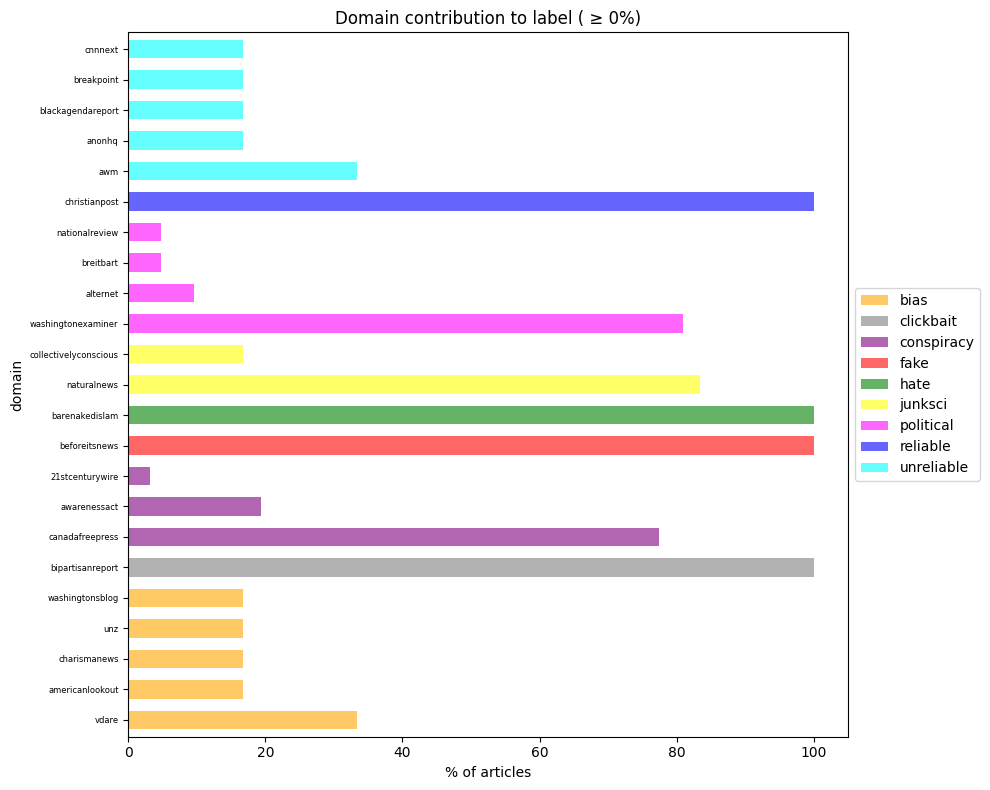

In [424]:
Stat.barplot_domain_contribution(threshold=0, percentage=True)

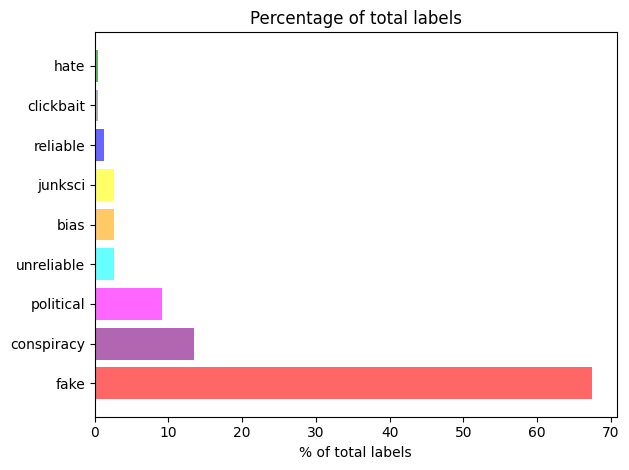

In [425]:
Stat.barplot_type_distribution(percentage = True)

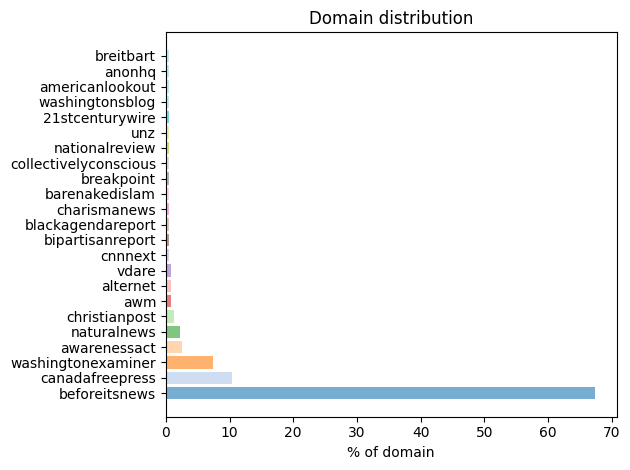

In [426]:
Stat.barplot_domain_distribution(percentage = True)

In [427]:
Stat.barplot_authors_contribution(threshold=1)

c:\projects\FakeNews\FakeNews\src\stats_hc.py:174: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


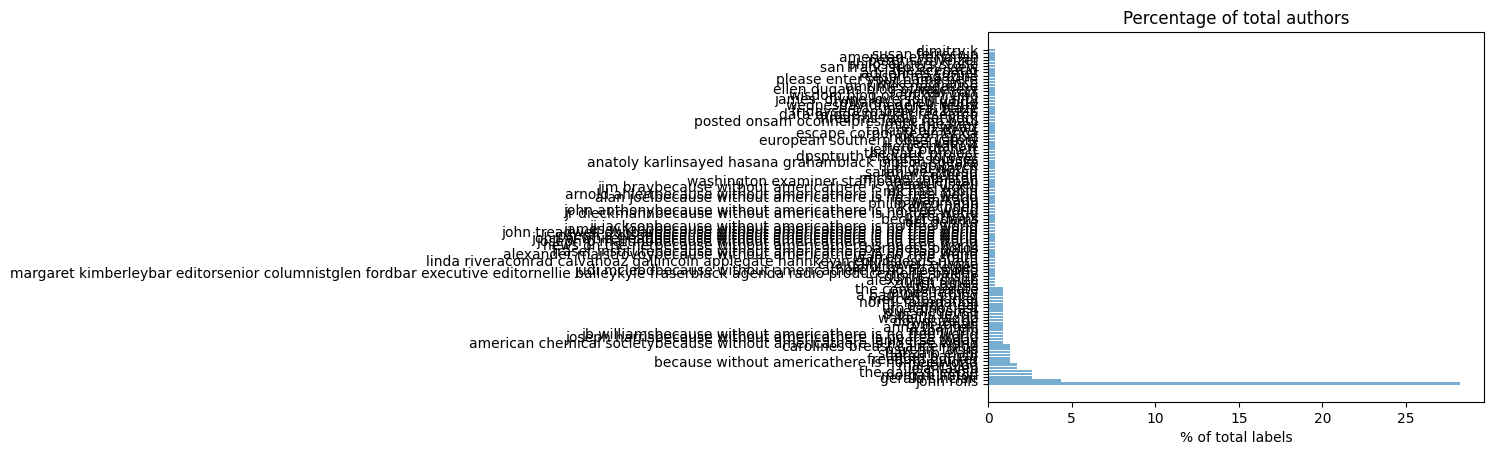

In [ ]:
Stat.barplot_authors_distribution(percentage = True)

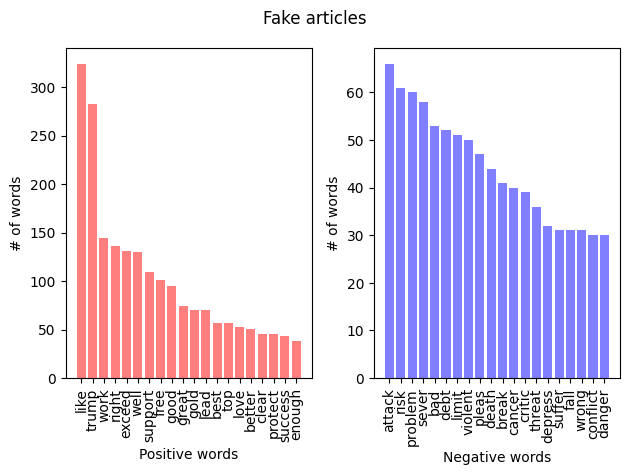

In [ ]:
Stat.barplot_pos_vs_neg_in_fake(nwords=20, binary_label="binary_label", percentage=False)

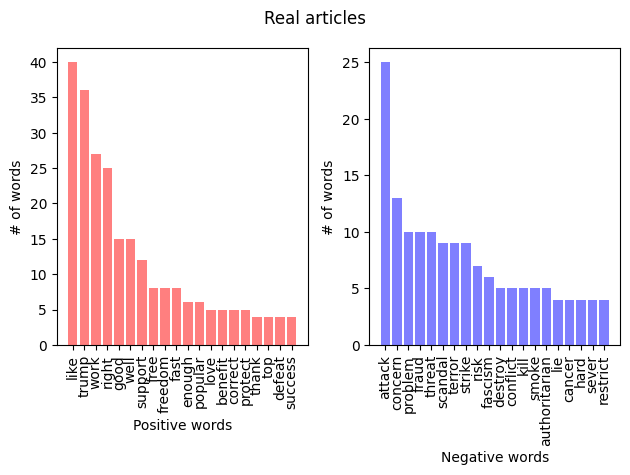

In [ ]:
Stat.barplot_pos_vs_neg_in_real(nwords=20, binary_label="binary_label", percentage=False)

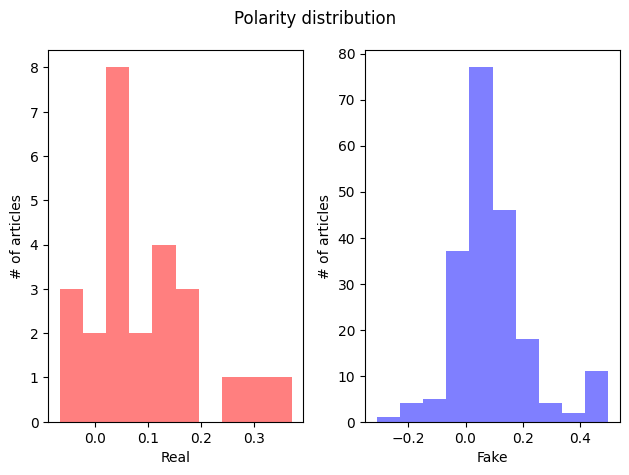

In [ ]:
Stat_sentences.barplot_polarity()

In [ ]:
Stat_sentences.barplot_subjectivity()

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'list'>